#Reference
https://www.kaggle.com/duykhanh99/lightgbm-starter-with-r-0-9493-lb

libraries

1 library(googledrive), for read data on driv

2 library(lightgbm), LGB 

3 library(rpart), decision tree

4 library(class): for knn

5 library(ROCR): plot ROC

6 library(caret): performance evaluation


#1. data
#2. LGB
#3. null model
#4. knn
#5. decision tree(unfinished)

#***1***

# read input


In [ ]:
R.version.string

[1] "R version 4.0.3 (2020-10-10)"

In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gargle’




In [ ]:
drive_auth(
  email = gargle::gargle_oauth_email(),
  path = NULL,
  scopes = "https://www.googleapis.com/auth/drive",
  cache = gargle::gargle_oauth_cache(),
  use_oob = gargle::gargle_oob_default(),
  token = NULL
)

ERROR: ignored

In [ ]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-0l3n5tr582q443rnomebdeeo0156b2bc.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g5E2AreLZdRRsNwD1pqZOFYXxrg-dILza-hZI1LoKqjZT-RMFPzT28


In [ ]:
drive_find(type = "csv")

# load data

In [ ]:
system("gdown --id 1EuusElMJ8Znzx6Nef-IUvg8lsc1-Xv7j")
train = read.csv("train.csv")

In [ ]:
write.csv(train[sample(nrow(train), 500), ])

In [ ]:
system("gdown --id 1Ch5jNZFfR8Ty5qDsAxgc98b9sO9HbbZs")


In [ ]:
test = read.csv("test.csv")

#data

In [ ]:
head(train)
head(test)

,X,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2987000,0,86400,68.5,4,10095,500,42,1,⋯,96,4,260,4,2,2,2,2,1,1735
2,2,2987001,0,86401,29.0,4,1372,303,42,2,⋯,96,4,260,4,2,2,2,2,1,1735
3,3,2987002,0,86469,59.0,4,2833,389,42,4,⋯,96,4,260,4,2,2,2,2,1,1735
4,4,2987003,0,86499,50.0,4,13341,466,42,2,⋯,96,4,260,4,2,2,2,2,1,1735
5,5,2987004,0,86506,50.0,1,2712,413,42,2,⋯,124,3,164,3,1,0,1,1,2,954
6,6,2987005,0,86510,49.0,4,3816,454,42,4,⋯,96,4,260,4,2,2,2,2,1,1735


,X,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,3663549,18403224,31.95,4,7332,10,42,4,108,⋯,96,4,260,4,2,2,2,2,1,1735
2,2,3663550,18403263,49.00,4,2549,10,42,4,108,⋯,96,4,260,4,2,2,2,2,1,1735
3,3,3663551,18403310,171.00,4,2695,473,42,4,108,⋯,96,4,260,4,2,2,2,2,1,1735
4,4,3663552,18403310,284.95,4,7789,259,42,4,58,⋯,96,4,260,4,2,2,2,2,1,1735
5,5,3663553,18403317,67.95,4,13256,351,42,2,14,⋯,96,4,260,4,2,2,2,2,1,1735
6,6,3663554,18403323,57.95,4,9252,220,42,4,108,⋯,96,4,260,4,2,2,2,2,1,1735


In [ ]:
install.packages('lightgbm')
library(lightgbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘data.table’


Loading required package: R6



In [ ]:
y<-train$isFraud
train$isFraud<-NULL

#***2***

#run LGB 
to vali and to produce ROC 

In [ ]:
tr_idx<-c(1:100000)
v_idx<-c(100001:130000)
d0 <- lgb.Dataset(data.matrix(train[tr_idx,]), label = y[tr_idx] )
dval <- lgb.Dataset(data.matrix(train[v_idx,]), label = y[v_idx] ) 

In [ ]:
lgb_param <- list(boosting_type = 'dart',
                  objective = "binary" ,
                  metric = "AUC",
                  boost_from_average = "false",
                  tree_learner  = "serial",
                  max_depth = -1,
                  learning_rate = 0.01,
                  num_leaves = 197,
                  feature_fraction = 0.3,          
                  bagging_freq = 1,
                  bagging_fraction = 0.7,
                  min_data_in_leaf = 100,
                  bagging_seed = 11,
                  max_bin = 255,
                  verbosity = -1)

In [ ]:
valids <- list(valid = dval)
lgb0 <- lgb.train(params = lgb_param,  data = d0, nrounds = 1000, 
                 eval_freq = 200, valids = valids, early_stopping_rounds = 400, verbose = 1, seed = 123)

[LightGBM] [Warning] verbosity is set=-1, verbose=1 will be ignored. Current value: verbosity=-1


Warning message in lgb.train(params = lgb_param, data = d0, nrounds = 1000, eval_freq = 200, :
“Early stopping is not available in 'dart' mode.”


[1] "[1]:  valid's auc:0.770706"
[1] "[201]:  valid's auc:0.884155"
[1] "[401]:  valid's auc:0.884702"
[1] "[601]:  valid's auc:0.886555"
[1] "[801]:  valid's auc:0.88852"
[1] "[1000]:  valid's auc:0.893213"


In [ ]:
oof_pred <- predict(lgb0, data.matrix(train[v_idx,]))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




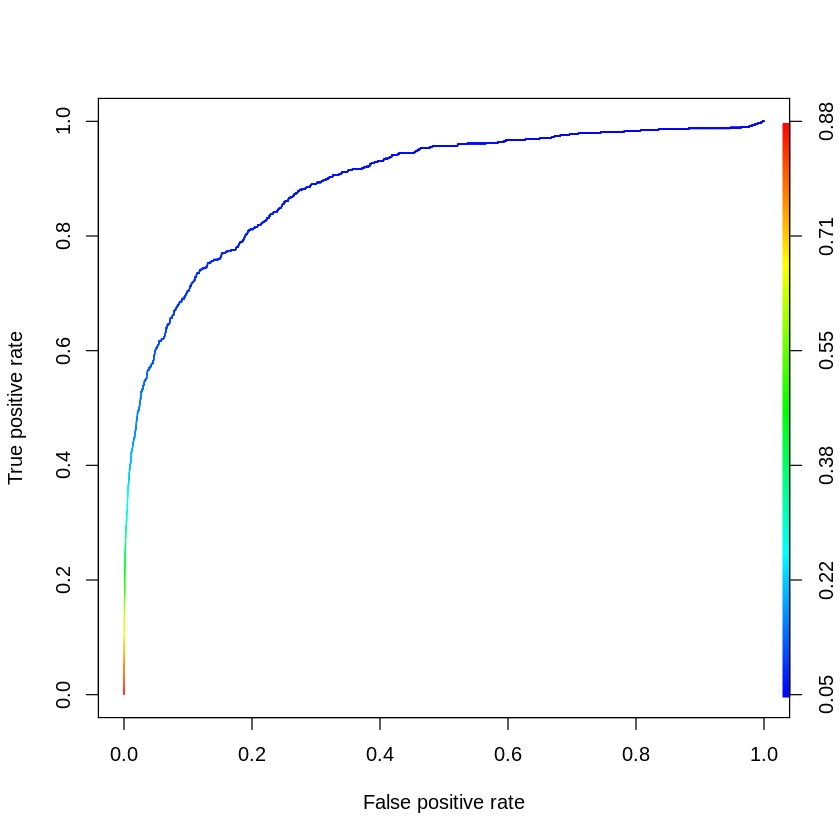

In [ ]:
install.packages('ROCR')
library(ROCR)
pr<-prediction(oof_pred, y[v_idx])
perf<-performance(pr,"tpr","fpr")
plot(perf,colorize=TRUE)

In [ ]:
oof_pred_bin<-c()
for(i in oof_pred){
  if(i<.42){
    oof_pred_bin<-c(oof_pred_bin,0)
  }else{
    oof_pred_bin<-c(oof_pred_bin,1)
  }
}

In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




[1] 0.45


ERROR: ignored

In [ ]:
oof_pred_bin1<-as.factor(oof_pred_bin)
y_v_idx_1<-as.factor(y[v_idx])
precision <- posPredValue(oof_pred_bin1, y_v_idx_1, positive="1")
recall <- sensitivity(oof_pred_bin1, y_v_idx_1, positive="1")
F1 <- (2 * precision * recall) / (precision + recall)
print('precision')
precision
print('recall')
recall
print('F1')
F1
cM<-table(truth=y[v_idx], prediction=oof_pred>.42)
print('confusion matrix')
cM
print('acuuracy')
(cM[2,2]+cM[1,1])/(cM[2,1]+cM[2,2]+cM[1,1]+cM[1,2])
print('sensitivity')
cM[2,2]/(cM[2,1]+cM[2,2])
print('specificity')
cM[1,1]/(cM[1,2]+cM[1,1])
cM[1,1]/(cM[1,2]+cM[1,1])
print('kappa')
kappa

[1] "precision"


[1] 0.7715736

[1] "recall"


[1] 0.2349304

[1] "F1"


[1] 0.3601896

[1] "confusion matrix"


     prediction
truth FALSE  TRUE
    0 29308    45
    1   495   152

[1] "acuuracy"


[1] 0.982

[1] "sensitivity"


[1] 0.2349304

[1] "specificity"


[1] 0.9984669

[1] 0.9984669

[1] "kappa"


[1] 0.3536825

In [ ]:
#Po = (TP + TN) / (TP + TN + FP + FN),

#Pe = ((TP + FN) * (TP + FP) + (FP + TN) * (FN + TN)) / (TP + TN + FP + FN)^2

#Kappa = (Po - Pe) / (1 - Pe)

tp<-152
tn<-29308
fp<-45
fn<-495
po<- 0.982
pe<- (((tp+fn)*(tp+fp))+((fp+tn)*(fn+tn)))/((tp+fp+tn+fn)^2)
kappa<-((po-pe)/(1-pe))

In [ ]:
#choose threshold => 0.42 used above
dddd<-c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8)
for(i in dddd){ 
  print(i)
  cM<-table(truth=y[v_idx], prediction=oof_pred>i)
  print(cM[1,1]+cM[2,2])
}
ssss<-c(0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45)
for(i in ssss){ 
  print(i)
  cM<-table(truth=y[v_idx], prediction=oof_pred>i)
  print(cM[1,1]+cM[2,2])
} #.42 best

[1] 0.1
[1] 27418
[1] 0.2
[1] 29307
[1] 0.3
[1] 29428
[1] 0.4
[1] 29460
[1] 0.5
[1] 29441
[1] 0.6
[1] 29426
[1] 0.7
[1] 29401
[1] 0.8
[1] 29374
[1] 0.35
[1] 29459
[1] 0.36
[1] 29456
[1] 0.37
[1] 29454
[1] 0.38
[1] 29456
[1] 0.39
[1] 29458
[1] 0.4
[1] 29460
[1] 0.41
[1] 29464
[1] 0.42
[1] 29460
[1] 0.43
[1] 29459
[1] 0.44
[1] 29457
[1] 0.45
[1] 29454


#modeling on full data & try 3 different nrounds
number of rounds starts from the best iteration above, which is 4, than to 10, 30, 100... so far 100 has the highest score, might some higher rounds but comsumes time however.

In [ ]:
#full data
iter <- lgb$best_iter
print(iter * 1.05,digits = 0)
d0 <- lgb.Dataset(data.matrix(train), label = y )
lgb <- lgb.train(params = lgb_param, data = d0, nrounds = 4, verbose = -1, seed = 123) #nrounds = iter * 1.05
pred <- predict(lgb, data.matrix(test))

imp <- lgb.importance(lgb)

[1] -1
[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


Warning message in lgb.train(params = lgb_param, data = d0, nrounds = 4, verbose = -1, :
“Early stopping is not available in 'dart' mode.”


In [ ]:
sub <- data.frame(read_csv("sample_submission.csv"))
sub[,2] <- pred
sub[,1] <- as.integer(sub[,1])
write.csv(sub,"submission.csv",row.names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  TransactionID = col_double(),
  isFraud = col_double()
)




In [ ]:
#d0 <- lgb.Dataset(data.matrix(train), label = y )
lgb <- lgb.train(params = lgb_param, data = d0, nrounds = 10, verbose = -1, seed = 123) #nrounds = iter * 1.05
pred <- predict(lgb, data.matrix(test))
sub <- data.frame(read_csv("sample_submission.csv"))
sub[,2] <- pred
sub[,1] <- as.integer(sub[,1])
write.csv(sub,"submission_10.csv",row.names = F)

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


Warning message in lgb.train(params = lgb_param, data = d0, nrounds = 10, verbose = -1, :
“Early stopping is not available in 'dart' mode.”

── Column specification ────────────────────────────────────────────────────────
cols(
  TransactionID = col_double(),
  isFraud = col_double()
)




In [ ]:
#d0 <- lgb.Dataset(data.matrix(train), label = y )
lgb <- lgb.train(params = lgb_param, data = d0, nrounds = 1000, verbose = -1, seed = 123) #nrounds = iter * 1.05
pred <- predict(lgb, data.matrix(test))
sub <- data.frame(read_csv("sample_submission.csv"))
sub[,2] <- pred
sub[,1] <- as.integer(sub[,1])
write.csv(sub,"submission_1000.csv",row.names = F)

[LightGBM] [Warning] verbosity is set=-1, verbose=-1 will be ignored. Current value: verbosity=-1


Warning message in lgb.train(params = lgb_param, data = d0, nrounds = 1000, verbose = -1, :
“Early stopping is not available in 'dart' mode.”


In [ ]:
library(class)
pr1<-knn(train,test,cl=y,k=2,prob=TRUE) 
sub[,2]<-prl
write.csv(sub,"submission_knn2.csv",row.names = F)

In [ ]:
d01

<lgb.Dataset>
  Public:
    construct: function () 
    create_valid: function (data, info = list(), ...) 
    dim: function () 
    finalize: function () 
    get_colnames: function () 
    get_params: function () 
    getinfo: function (name) 
    initialize: function (data, params = list(), reference = NULL, colnames = NULL, 
    save_binary: function (fname) 
    set_categorical_feature: function (categorical_feature) 
    set_colnames: function (colnames) 
    set_reference: function (reference) 
    setinfo: function (name, info) 
    slice: function (idxset, ...) 
    update_params: function (params) 
  Private:
    categorical_feature: NULL
    colnames: X TransactionID TransactionDT TransactionAmt ProductCD c ...
    free_raw_data: TRUE
    get_handle: function () 
    handle: 4.63611011586869e-310
    info: list
    params: list
    predictor: NULL
    raw_data: NULL
    reference: NULL
    set_predictor: function (predictor) 
    used_indices: NULL
    version: 1

#***3***

#null model

[1] 0.1287648 0.2866614 0.1693616 0.9284918 0.5281163 0.5320208

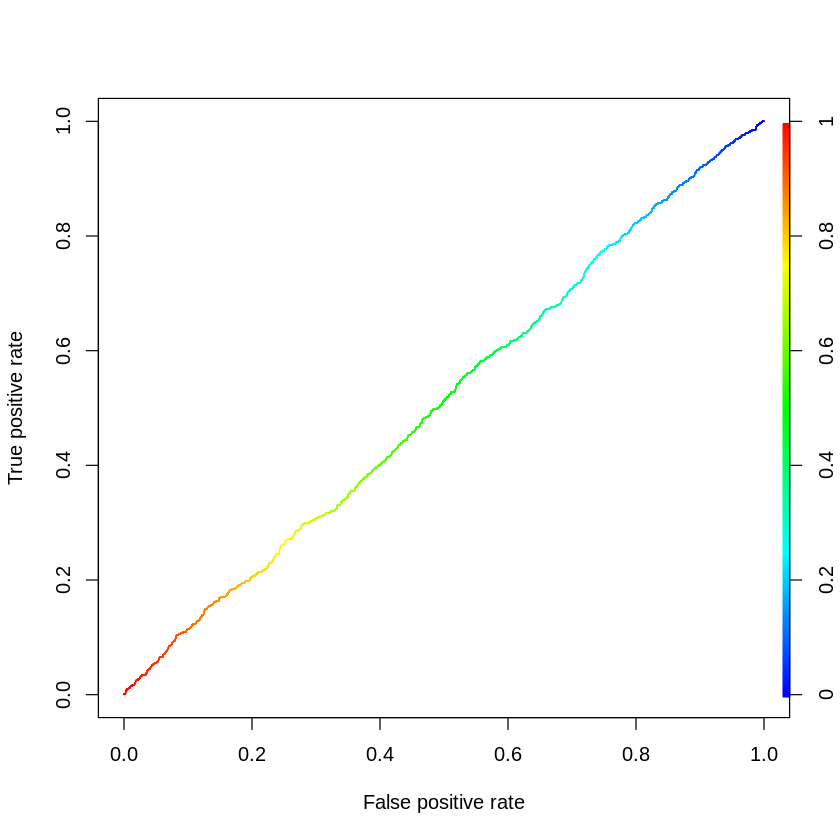

In [ ]:
null_pred<-c()
for(i in c(1:30000)){
  null_pred<-c(null_pred,runif(1))
}
head(null_pred)
pr1<-prediction(null_pred, y[1:30000])
perf1<-performance(pr1,"tpr","fpr")
plot(perf1,colorize=TRUE)

In [ ]:
#choose threshold => 0.42 used above
dddd<-c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)
for(i in dddd){ 
  print(i)
  cM<-table(truth=y[1:30000], prediction=null_pred>i)
  print(cM[1,1]+cM[2,2])
}
ssss<-c(0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95)
for(i in ssss){ 
  print(i)
  cM<-table(truth=y[1:30000], prediction=null_pred>i)
  print(cM[1,1]+cM[2,2])
} #.95 best

[1] 0.1
[1] 3669
[1] 0.2
[1] 6537
[1] 0.3
[1] 9330
[1] 0.4
[1] 12121
[1] 0.5
[1] 15004
[1] 0.6
[1] 17817
[1] 0.7
[1] 20663
[1] 0.8
[1] 23498
[1] 0.9
[1] 26340
[1] 0.85
[1] 24917
[1] 0.86
[1] 25169
[1] 0.87
[1] 25448
[1] 0.88
[1] 25760
[1] 0.89
[1] 26065
[1] 0.9
[1] 26340
[1] 0.91
[1] 26632
[1] 0.92
[1] 26921
[1] 0.93
[1] 27188
[1] 0.94
[1] 27456
[1] 0.95
[1] 27729


In [ ]:
null_pred_bin<-c()
for(i in null_pred){
  if(i<.97){
    null_pred_bin<-c(null_pred_bin,0)
  }else{
    null_pred_bin<-c(null_pred_bin,1)
  }
}

In [ ]:
null_pred_bin1<-as.factor(null_pred_bin)
y_v_idx_2<-as.factor(y[1:30000])
precision <- posPredValue(null_pred_bin1, y_v_idx_2, positive="1")
recall <- sensitivity(null_pred_bin1, y_v_idx_2, positive="1")
F1 <- (2 * precision * recall) / (precision + recall)
print('precision')
precision
print('recall')
recall
print('F1')
F1
cM<-table(truth=y[1:30000], prediction=null_pred>.97)
print('confusion matrix')
cM
print('acuuracy')
(cM[2,2]+cM[1,1])/(cM[2,1]+cM[2,2]+cM[1,1]+cM[1,2])
print('sensitivity')
cM[2,2]/(cM[2,1]+cM[2,2])
print('specificity')
cM[1,1]/(cM[1,2]+cM[1,1])
print('kappa')
kappa

[1] "precision"


[1] 0.03145336

[1] "recall"


[1] 0.03372093

[1] "F1"


[1] 0.0325477

[1] "confusion matrix"


     prediction
truth FALSE  TRUE
    0 28247   893
    1   831    29

[1] "acuuracy"


[1] 0.9425333

[1] "sensitivity"


[1] 0.03372093

[1] "specificity"


[1] 0.9693548

[1] "kappa"


[1] 0.002971807

In [ ]:
#Po = (TP + TN) / (TP + TN + FP + FN),

#Pe = ((TP + FN) * (TP + FP) + (FP + TN) * (FN + TN)) / (TP + TN + FP + FN)^2

#Kappa = (Po - Pe) / (1 - Pe)

po<- 0.942533333333333
pe<- (((29+831)*(29+893))+((893+28247)*(831+28247)))/((cM[2,1]+cM[2,2]+cM[1,1]+cM[1,2])^2)
kappa<-((po-pe)/(1-pe))

In [ ]:
#null model 1:length(test[,2])
null_pred<-c()
for(i in 1:length(test[,2])){
  null_pred<-c(null_pred,runif(1))
}
sub[,2]<-null_pred
write.csv(sub,"submission_null.csv",row.names = F)

#***4***

#knn

In [ ]:
library(class)
#with smaller dataset 
index<-sample(1:100000,10000)
trn_idx<-index[1:8000]
vali_idx<-index[8001:10000]
y<-train$isFraud
train$isFraud<-NULL
train1<-train[trn_idx,]
vali1<-train[vali_idx,]
y_train1<-y[trn_idx]
y_vali1<-y[vali_idx]
k2<-knn(train1,vali1,cl=y_train1,k=2,prob=TRUE) 
cm2<-table(k2,y_vali1)
print('--2')
sum(diag(cm2))/sum(cm2)
#plot
y_vali1<-as.numeric(y_vali1)
k2<-as.numeric(k2)
library(ROCR)
pr<-prediction(k2, y_vali1)
perf<-performance(pr,"tpr","fpr")
plot(perf,colorize=TRUE)
#full data
k<-knn(train,test,cl=y,k=2) 
out<-data.frame(TransactionID=as.integer(test[,2]),isFraud=k)
write.csv(out, file='result_knn.csv', row.names = F)

#***5***

#decision tree

In [ ]:
library('rpart')

In [ ]:
# train the model 
model <- rpart(isFraud~., data=train, method="class")

In [ ]:
# make predictions
model

n= 590540 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 590540 20663 0 (0.96500999 0.03499001)  
   2) V258< 2.5 584316 16856 0 (0.97115260 0.02884740) *
   3) V258>=2.5 6224  2417 1 (0.38833548 0.61166452)  
     6) C1< 4.5 3032  1117 0 (0.63159631 0.36840369)  
      12) C14>=0.5 1865   351 0 (0.81179625 0.18820375) *
      13) C14< 0.5 1167   401 1 (0.34361611 0.65638389) *
     7) C1>=4.5 3192   502 1 (0.15726817 0.84273183) *

In [ ]:
train_resultframe <- data.frame(truth=train$isFraud, pred=predict(model, newdata=train, type="class"))

In [ ]:
install.packages("rpart.plot") #第一次使用前須先安裝
library(rpart.plot)
prp(model)	

In [ ]:
model <- glm(isFraud~., data=train, family=binomial(link="logit"))
